In [1]:
import os
import sys
import numpy as np
from graph_tool.all import triangulation, label_components
import hdbscan
import graph_tool
import matplotlib.pyplot as plt
from scipy.linalg import norm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from HierarchicalGeoClustering.TreeClusters import *
from HierarchicalGeoClustering.Clustering import *


In [2]:

HGC = TreeClusters(4, random_seed= 124)
HGC.populate_tree(number_per_cluster=40, avoid_intersec= True)
original_points= HGC.get_points_tree()
X_2=np.array([[p.x,p.y] for p in original_points])
dic_points={'points':[X_2], 'parent':''}
res_AMOEBA_clus, noise = compute_AMOEBA(X_2, return_noise = True)

/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:96: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return shapely.ops.cascaded_union(keep_triangles)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:377: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  points_cluster_o = [p for p in points_cluster if
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:1086: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_points =all_points+[i for i in node.get_points(all_tag = iterative )]
/Partition1/Cgeo/git/HierarchicalGeoCluste

/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:689: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  x_points_cluster =[j.x for j in cluster_points  ]
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/TreeClusters.py:690: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  y_points_cluster =[j.y for j in cluster_points  ]


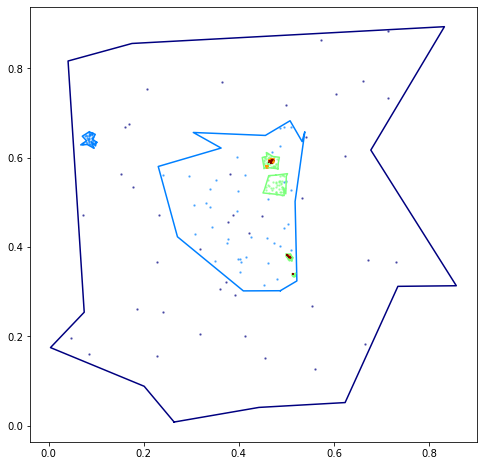

In [3]:
fig, axs = plt.subplots( figsize=(8,8))
HGC.visualize(axs, polygon=True)

In [4]:
 tree_AMOEBA = recursive_clustering_tree(dic_points,
                                         algorithm = 'amoeba',  # Algorithm to use
                                         return_noise = True,
                                         levels_clustering= 5,
                                                # verbose = True
                                                )

/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

In [5]:
cluster_tree = []
recursive_clustering([dic_points],  # Dictionary with Points
                4,  # levels to process
                cluster_tree,  # to store the clusters
                level=0,  # current level
                algorithm= 'amoeba',
                return_noise = True,
                )

/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)
/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_

In [6]:
cluster_tree

[[{'points': [array([[0.16009996, 0.66905954],
           [0.36094277, 0.30667878],
           [0.15126728, 0.56341906],
           ...,
           [0.50092654, 0.38284211],
           [0.50090247, 0.38277035],
           [0.50103878, 0.38277888]])],
   'parent': '_L_0_l_0_c_0',
   'noise_points': None}],
 [{'points': [array([[0.16009996, 0.66905954],
           [0.36094277, 0.30667878],
           [0.15126728, 0.56341906],
           ...,
           [0.50092654, 0.38284211],
           [0.50090247, 0.38277035],
           [0.50103878, 0.38277888]])],
   'parent': '_L_0_l_0_c_0_L_1_l_0_c_0',
   'noise_points': None}],
 [{'points': [array([[0.16009996, 0.66905954],
           [0.36094277, 0.30667878],
           [0.15126728, 0.56341906],
           ...,
           [0.50092654, 0.38284211],
           [0.50090247, 0.38277035],
           [0.50103878, 0.38277888]])],
   'parent': '_L_0_l_0_c_0_L_1_l_0_c_0_L_2_l_0_c_0',
   'noise_points': None}],
 [{'points': [array([[0.16009996, 0.6690595

In [7]:
tree_clus= get_tree_from_clustering(cluster_tree)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

In [8]:
compute_AMOEBA(X_2,
                return_noise = True,

              )

/Partition1/Cgeo/git/HierarchicalGeoClustering/HierarchicalGeoClustering/Clustering.py:958: RuntimeWarning: invalid value encountered in double_scalars
  tolerance = global_edge_std * (global_edge_mean/local_mean)


([array([[0.16009996, 0.66905954],
         [0.36094277, 0.30667878],
         [0.15126728, 0.56341906],
         ...,
         [0.50092654, 0.38284211],
         [0.50090247, 0.38277035],
         [0.50103878, 0.38277888]])],
 None)

In [54]:
def compute_AMOEBA_file(points_array, **kwargs):
    """The function obtains the AMOEBA algorithm on level basis
    
    :param np.array points2_clusters: a (N,2) numpy array containing the obsevations
    
    :returns: list with numpy arrays for all the clusters obtained
    """
    
    scale_points= kwargs.get('scale_points',True)
    debugg = kwargs.get('verbose',False)
    ret_noise = kwargs.get('return_noise', True)
    if scale_points ==True:
        scaler = StandardScaler()
        points_arr = scaler.fit_transform(points_array)
    else:
        points_arr = points_array
    
    gr, pos_d =triangulation(points_arr, "delaunay")
    dis_d = gr.new_edge_property("double")
    for e in gr.edges():
        dis_d[e] =  norm(pos_d[e.target()].a - pos_d[e.source()].a)
    gr.edge_properties["dis"] = dis_d
    gr.vertex_properties["pos"] = pos_d
    global_edge_mean= np.nan_to_num(gr.edge_properties['dis'].get_array().mean())
    global_edge_std = np.nan_to_num(gr.edge_properties['dis'].get_array().std() )
    
    all_remove_level =[]
    all_keep_level = []
    for vert in gr.vertices():
        local_mean= np.mean([gr.edge_properties['dis'][vo_edge]  for vo_edge in vert.out_edges()])
        tolerance = global_edge_std * (global_edge_mean/local_mean)
        rem_edg_loc = []
        keep_edg_loc = []
        for ed in vert.all_edges():
            if gr.edge_properties['dis'][ed] > tolerance + global_edge_mean:
                rem_edg_loc.append(ed)
            else:
                keep_edg_loc.append(ed)
        all_keep_level.append(keep_edg_loc)
        all_remove_level.append(rem_edg_loc)
    
    all_remove_level_flat= []
    for _list in all_remove_level:
        all_remove_level_flat += _list
    all_keep_level_flat= []
    for _list in all_keep_level:
        all_keep_level_flat += _list
    level_n = gr.new_edge_property("bool", True)
    gr.edge_properties["level_n_tolerance"] = level_n
    
    #### Probably not needed or can be reduce
    #### The edge tolerance
    for i in all_remove_level_flat:
        gr.edge_properties['level_n_tolerance'][i]= False
    for i in all_keep_level_flat:
        gr.edge_properties['level_n_tolerance'][i]= True
        
    gr.set_edge_filter(prop =  gr.edge_properties['level_n_tolerance'])
    
    
    ##### If the vertex should be keep
    gr.vertex_properties["level_n_r"] = gr.new_vertex_property("bool", False)
    for vert in gr.vertices():
        if vert.in_degree() + vert.out_degree()> 0:
            gr.vertex_properties['level_n_r'][vert]= True
        else: 
            gr.vertex_properties['level_n_r'][vert]= False
    ##  to not consider the noise points
    gr.set_vertex_filter(prop =  gr.vertex_properties['level_n_r'])
    
    ## Get the connected components
    level_n_components_arr, comp_n_hist = label_components(gr)
    gr.set_vertex_filter(None)
    
    gr.vertex_properties["compo_level_n"] = gr.new_vertex_property("int", -1)
    
    gr.set_vertex_filter(prop =  gr.vertex_properties['level_n_r'])
    
    
    compo_level_res_n = gr.new_vertex_property("int", -1)
    compo_level_res_n.a = level_n_components_arr.a
    gr.vertex_properties["compo_level_res_n"] = compo_level_res_n
    
    for vert in gr.vertices():
        # print(num)
        if vert.in_degree() + vert.out_degree()> 0:
            gr.vertex_properties['compo_level_n'][vert]= gr.vertex_properties["compo_level_res_n"][vert] 
        else: 
            # print('No edge')
            gr.vertex_properties['compo_level_n'][vert]= -1
    
    
    ####### get the points for each cluster 
    clusters_result_n= np.nan_to_num(np.unique(gr.vertex_properties['compo_level_n'].a))
    clusters=[]
    noise_level= None
    for clas in clusters_result_n :
        if clas != -1:
            clas_mask = ( gr.vertex_properties['compo_level_n'].a == clas)
            clusters.append(points_array[clas_mask])
        else:
            clas_mask = ( gr.vertex_properties['compo_level_n'].a == clas)
            noise_level= points_array[clas_mask]
    if ret_noise == True:
        return clusters, noise_level
    return clusters
        
    

In [55]:
res_file = compute_AMOEBA_file(X_2,
                return_noise = True,
                scale_points=False

              )

In [39]:
def compute_AMOEBA_single(points_array, **kwargs):
    """The function obtains the AMOEBA algorithm on level basis
    
    :param np.array points2_clusters: a (N,2) numpy array containing the obsevations
    
    :returns: list with numpy arrays for all the clusters obtained
    """
    scale_points= kwargs.get('scale_points',True)
    debugg = kwargs.get('verbose',False)
    ret_noise = kwargs.get('return_noise', True)
    cur_lev = kwargs.get('level', 0)
    
    if scale_points ==True:
        scaler = StandardScaler()
        points_arr = scaler.fit_transform(points_array)
    else:
        points_arr = points_array
    gr, pos_d =triangulation(points_arr, "delaunay")
    dis_d = gr.new_edge_property("double")
    for e in gr.edges():
        dis_d[e] =  norm(pos_d[e.target()].a - pos_d[e.source()].a)
    gr.edge_properties["dis"] = dis_d
    gr.vertex_properties["pos"] = pos_d
    global_edge_mean= np.nan_to_num(gr.edge_properties['dis'].get_array().mean())
    global_edge_std = np.nan_to_num(gr.edge_properties['dis'].get_array().std() ) 
    all_remove_level =[]
    all_keep_level = []
    for vert in gr.vertices():
        local_mean= np.mean([gr.edge_properties['dis'][vo_edge]  for vo_edge in vert.out_edges()])
        tolerance = global_edge_std * (global_edge_mean/local_mean)
        rem_edg_loc = []
        keep_edg_loc = []
        for ed in vert.all_edges():
            if gr.edge_properties['dis'][ed] > tolerance + global_edge_mean:
                rem_edg_loc.append(ed)
            else:
                keep_edg_loc.append(ed)
        all_keep_level.append(keep_edg_loc)
        all_remove_level.append(rem_edg_loc)
    
    all_remove_level_flat= []
    for _list in all_remove_level:
        all_remove_level_flat += _list
    all_keep_level_flat= []
    for _list in all_keep_level:
        all_keep_level_flat += _list
    level_n = gr.new_edge_property("bool", True)
    gr.edge_properties["level_n_tolerance"] = level_n
    
    #### Probably not needed or can be reduce
    #### The edge tolerance
    for i in all_remove_level_flat:
        # print(i)
        gr.edge_properties['level_n_tolerance'][i]= False
    # print(all_keep_level_flat)
    for i_k in all_keep_level_flat:
        # print(i_k)
        gr.edge_properties['level_n_tolerance'][i_k]= True
        
    gr.set_edge_filter(prop =  gr.edge_properties['level_n_tolerance'])
    
    
    ##### If the vertex should be keep
    gr.vertex_properties["level_n_r"] = gr.new_vertex_property("bool", False)
    for vert in gr.vertices():
        if vert.in_degree() + vert.out_degree()> 0:
            gr.vertex_properties['level_n_r'][vert]= True
        else: 
            gr.vertex_properties['level_n_r'][vert]= False
    ##  to not consider the noise points
    gr.set_vertex_filter(prop =  gr.vertex_properties['level_n_r'])
    
    ## Get the connected components
    level_n_components_arr, comp_n_hist = label_components(gr)
    gr.set_vertex_filter(None)
    
    gr.vertex_properties["compo_level_n"] = gr.new_vertex_property("int", -1)
    
    gr.set_vertex_filter(prop =  gr.vertex_properties['level_n_r'])
    
    
    compo_level_res_n = gr.new_vertex_property("int", -1)
    compo_level_res_n.a = level_n_components_arr.a
    gr.vertex_properties["compo_level_res_n"] = compo_level_res_n
    
    for vert in gr.vertices():
        # print(num)
        if vert.in_degree() + vert.out_degree()> 0:
            gr.vertex_properties['compo_level_n'][vert]= gr.vertex_properties["compo_level_res_n"][vert] 
        else: 
            # print('No edge')
            gr.vertex_properties['compo_level_n'][vert]= -1
    
    
    ##### Now with the get the vertices in the graph that are in the
    ## connected components   
    dic_bool_arr_n={}
    clusters_result_n= np.nan_to_num(np.unique(gr.vertex_properties['compo_level_n'].a))

    for i in np.nan_to_num(np.unique(gr.vertex_properties['compo_level_n'].a)):
        clus_i_dic = gr.new_vertex_property("int", -1)
        clus_i_dic.a = gr.vertex_properties['compo_level_n'].a == i
        if i == -1:
            gr.vertex_properties["level_n_clus_"+ 'noise']= clus_i_dic
        else:
            gr.vertex_properties["level_n_clus_"+ str(i)] = clus_i_dic
    ################### Here is where the difference should hapen or the create 
    ### a new or use the same graph
    
    return gr

        
    

In [57]:
res_file[1]

array([[0.36094277, 0.30667878],
       [0.15126728, 0.56341906],
       [0.71302011, 0.73373025],
       [0.18493644, 0.26187527],
       [0.6707869 , 0.3702328 ],
       [0.37290403, 0.32160128],
       [0.73051898, 0.36645691],
       [0.55408276, 0.26849776],
       [0.54145464, 0.64684029],
       [0.22843325, 0.15643192],
       [0.71313828, 0.88429236],
       [0.08544109, 0.16010648],
       [0.3925926 , 0.29231947],
       [0.20684932, 0.75458694],
       [0.41329379, 0.20046332],
       [0.24103756, 0.25569583],
       [0.44866878, 0.46901097],
       [0.04682985, 0.19748971],
       [0.66560266, 0.18379804],
       [0.38210407, 0.56434296],
       [0.60484721, 0.74305493],
       [0.4998055 , 0.71894071],
       [0.57198685, 0.86457623],
       [0.45483458, 0.15117884],
       [0.56063027, 0.12719588],
       [0.66170013, 0.77179718],
       [0.0715051 , 0.4724806 ],
       [0.23258237, 0.47092186],
       [0.31923972, 0.39652872],
       [0.31891616, 0.20649107],
       [0.

In [40]:
grap_single= compute_AMOEBA_single(X_2,
                return_noise = True,
                scale_points=False

              )

In [46]:
grap_single.vertex_properties['compo_level_n'].a

PropertyArray([ 0, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1, -1, -1,
               -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
               -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  3,  4, -1,  3,  2,
               -1, -1,  5, -1,  4,  5,  4,  5,  6,  6,  7,  5,  8,  9,  5,
                9,  1,  9,  5, -1,  9, -1,  9,  7, -1,  5, -1, -1, -1,  8,
                3, -1,  9,  3,  3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
               10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
               10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
                9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
                9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  5,  5,  5,  5,  5,
                5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
                5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
                5,  5,  5

In [49]:
####### get the points for each cluster 
clusters_result_n= np.nan_to_num(np.unique(grap_single.vertex_properties['compo_level_n'].a))
clusters=[]
noise_level= None
for clas in clusters_result_n :
    if clas != -1:
        clas_mask = ( grap_single.vertex_properties['compo_level_n'].a == clas)
        clusters.append(X_2[clas_mask])
    else:
        clas_mask = ( grap_single.vertex_properties['compo_level_n'].a == clas)
        noise_level= X_2[clas_mask]


In [53]:
clusters[0] == res_file[0][0]

/home/miguel/anaconda3/envs/shac/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [14]:
def build_delaunay_from_arr(points_array, **kwargs):
    
    scale_points= kwargs.get('scale_points',True)
    debugg = kwargs.get('verbose',False)
    ret_noise = kwargs.get('return_noise', True)
    
    if scale_points ==True:
        scaler = StandardScaler()
        points_arr = scaler.fit_transform(points_array)
    else:
        points_arr = points_array
    gr, pos = triangulation(points_arr, "delaunay")
    dis = gr.new_edge_property("double")
    dis = gr.new_edge_property("double")
    for e in gr.edges():
        dis[e] =  norm(pos[e.target()].a - pos[e.source()].a)
    gr.edge_properties["dis"] = dis
    gr.vertex_properties["pos"] = pos
    return gr

def compute_AMOEBA_graph_arr(points_array, **kwargs):
    
    """The function obtains the result of the  AMOEBA algorithm as a graph 
    analisys
    
    :param np.array points2_clusters: a (N,2) numpy array containing the obsevations
    
    :returns: list with numpy arrays for all the clusters obtained
    """
    
    
    gr = build_delaunay_from_arr(points_array, **kwargs)
    
    ##### here is the iterative 
    compute_AMOEBA_graph_graph(gr, **kwargs)
    


In [15]:
    
def compute_AMOEBA_graph_graph(graph, **kwargs):
    """The function obtains the result of the  AMOEBA algorithm as a graph 
    analisys
    
    :param graph-tool graph: a Graph class object from graph-tool
    (Obtained from delaunay triangulation or some other triangulation 
    has to be conected in order to make the evaluation on the edges)
    
    :returns: list with numpy arrays for all the clusters obtained
    """

    cur_lev = kwargs.get('level', 1)
    component_to_get_s= kwargs.get('component_to_get_s', '')
    edges_keep_s = kwargs.get('edges_keep_s', '')
    verbose = kwargs.get('verbose', False)
    
    graph.set_edge_filter(None)
    graph.set_vertex_filter(None)
    
    if verbose:
        print('Component to get: ' , component_to_get_s)
        print('Edges to keep: ',  edges_keep_s)
    
    
    ##########
    if component_to_get_s != '':
        component_to_get = graph.vertex_properties[component_to_get_s]
        graph.set_vertex_filter(component_to_get)
    if edges_keep_s != '':
        edges_keep = graph.edge_properties[edges_keep_s]
        graph.set_edge_filter(edges_keep)
    ##### The mean and the standar deviation can not be compute using all the 
    ## edges there for it has to be in a loop
    
    dis_lev = graph.get_edges(eprops=[graph.edge_properties['dis']])[:,2]
    global_mean = dis_lev.mean()
    global_edge_std  = dis_lev.std() 
    all_remove_level = []
    all_keep_level =  []
    if verbose:
        print('The global mean:', global_mean)
        print('The global std:', global_edge_std)
    for vert in graph.vertices():
        
        local_mean= np.mean([graph.edge_properties['dis'][vo_edge]  for vo_edge in vert.out_edges()])
        tolerance = global_edge_std * (global_mean/local_mean)
        rem_edg_loc = []
        keep_edg_loc = []
        for ed in vert.all_edges():
            if graph.edge_properties['dis'][ed] > tolerance + global_mean:
                rem_edg_loc.append(ed)
            else:
                keep_edg_loc.append(ed)
        all_keep_level.append(keep_edg_loc)
        all_remove_level.append(rem_edg_loc)
    
    all_remove_level_flat= []
    for _list in all_remove_level:
        all_remove_level_flat += _list
    all_keep_level_flat= []
    for _list in all_keep_level:
        all_keep_level_flat += _list
    level_n = graph.new_edge_property("bool", True)
    graph.edge_properties['l_'+str(cur_lev)+'_tol'] = level_n
    #### Probably not needed or can be reduce
    #### The edge tolerance
    for i in all_remove_level_flat:
        graph.edge_properties['l_'+str(cur_lev)+'_tol'][i]= False
    for i in all_keep_level_flat:
        graph.edge_properties['l_'+str(cur_lev)+'_tol'][i]= True
        
    graph.set_edge_filter(prop = graph.edge_properties['l_'+str(cur_lev)+'_tol'])
    
    ##### If the vertex should be keep
    graph.vertex_properties['l_'+str(cur_lev)+'_tol_r'] = graph.new_vertex_property("bool", False)
    for vert in graph.vertices():
        if vert.in_degree() + vert.out_degree()> 0:
            graph.vertex_properties['l_'+str(cur_lev)+'_tol_r'][vert]= True
        else: 
            graph.vertex_properties['l_'+str(cur_lev)+'_tol_r'][vert]= False
    ##  to not consider the noise points
    graph.set_vertex_filter(prop =  graph.vertex_properties['l_'+str(cur_lev)+'_tol_r'])
    
    ## Get the connected components
    level_n_components_arr, comp_n_hist = label_components(graph)
    graph.set_vertex_filter(None)
    
    
    if verbose:
        print('Set vertex property:' , component_to_get_s +'_compo_l_'+ str(cur_lev))
        print('and filter using such property')
            
    graph.vertex_properties[component_to_get_s +'_compo_l_'+ str(cur_lev)] = graph.new_vertex_property("int", -1)
    
    graph.set_vertex_filter(prop =  graph.vertex_properties['l_'+str(cur_lev)+'_tol_r'])
    
    
    compo_level_res_n = graph.new_vertex_property("int", -1)
    compo_level_res_n.a = level_n_components_arr.a
    graph.vertex_properties[component_to_get_s+'_compo_l_'+str(cur_lev)+'_res'] = compo_level_res_n
    
    for vert in graph.vertices():
        # print(num)
        if vert.in_degree() + vert.out_degree()> 0:
            graph.vertex_properties[component_to_get_s +'_compo_l_'+ str(cur_lev)][vert]= graph.vertex_properties[component_to_get_s +'_compo_l_'+str(cur_lev)+'_res' ][vert] 
        else: 
            # print('No edge')
            graph.vertex_properties[component_to_get_s+'_compo_l_'+str(cur_lev)][vert]= -1
    
    
    ##### Now with the get the vertices in the graph that are in the
    ## connected components   
    dic_bool_arr_n={}
    clusters_result_n= np.nan_to_num(np.unique(graph.vertex_properties[component_to_get_s+'_compo_l_'+str(cur_lev)].a))
    if verbose:
        print(clusters_result_n)
        
    for i in np.nan_to_num(np.unique(graph.vertex_properties[component_to_get_s+'_compo_l_'+str(cur_lev)].a)):
        clus_i_dic = graph.new_vertex_property("bool", 0)
        clus_i_dic.a = graph.vertex_properties[component_to_get_s+'_compo_l_'+str(cur_lev)].a == i
        if verbose:
            print('Level', str(cur_lev)  )
            print('Points in cluster ', str(i), sum(clus_i_dic.a)  )
        if i == -1:
            graph.vertex_properties[component_to_get_s+'_l_'+str(cur_lev)+ '_noise']= clus_i_dic
        else:
            graph.vertex_properties[component_to_get_s+'_l_'+str(cur_lev)+ '_clus_'+ str(i)] = clus_i_dic
    ################### Here is where the difference should hapen or the create 
    ### a new or use the same graph
    
    # return graph




In [16]:
gra_dela=build_delaunay_from_arr(X_2, scale_points=False)

In [18]:
compute_AMOEBA_graph_graph(gra_dela, level=1, verbose = True)

Component to get:  
Edges to keep:  
The global mean: 0.009675473661517983
The global std: 0.03407851798560764
Set vertex property: _compo_l_1
and filter using such property
[-1  0  1  2  3  4  5  6  7  8  9 10]
Level 1
Points in cluster  -1 46
Level 1
Points in cluster  0 2
Level 1
Points in cluster  1 3
Level 1
Points in cluster  2 2
Level 1
Points in cluster  3 5
Level 1
Points in cluster  4 3
Level 1
Points in cluster  5 327
Level 1
Points in cluster  6 2
Level 1
Points in cluster  7 2
Level 1
Points in cluster  8 2
Level 1
Points in cluster  9 486
Level 1
Points in cluster  10 40


In [20]:
gra_dela.properties

{('e',
  'dis'): <EdgePropertyMap object with value type 'double', for Graph 0x7f13bc39a890, at 0x7f13c56a7dd0>,
 ('v',
  'pos'): <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f13bc39a890, at 0x7f13b41c8c10>,
 ('e',
  'l_1_tol'): <EdgePropertyMap object with value type 'bool', for Graph 0x7f13bc39a890, at 0x7f13b411e050>,
 ('v',
  'l_1_tol_r'): <VertexPropertyMap object with value type 'bool', for Graph 0x7f13bc39a890, at 0x7f13b411e090>,
 ('v',
  '_compo_l_1'): <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f13bc39a890, at 0x7f13b411e3d0>,
 ('v',
  '_compo_l_1_res'): <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f13bc39a890, at 0x7f13b411e2d0>,
 ('v',
  '_l_1_noise'): <VertexPropertyMap object with value type 'bool', for Graph 0x7f13bc39a890, at 0x7f13b41ed2d0>,
 ('v',
  '_l_1_clus_0'): <VertexPropertyMap object with value type 'bool', for Graph 0x7f13bc39a890, at 0x7f13b411eb90>,
 ('v',
  '_l_1_clus_1'): <VertexPropert

In [21]:
compute_AMOEBA_graph_graph(gra_dela,
                           level=2,
                           component_to_get_s= '_l_1_clus_3' ,
                           edges_keep_s= 'l_1_tol',
                           verbose = True)

Component to get:  _l_1_clus_3
Edges to keep:  l_1_tol
The global mean: 0.012730431461515123
The global std: 0.005898091076508501
Set vertex property: _l_1_clus_3_compo_l_2
and filter using such property
[-1  0]
Level 2
Points in cluster  -1 916
Level 2
Points in cluster  0 4
